In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jacklizhi/creditcard")

Skipping, found downloaded files in ".\creditcard" (use force=True to force download)


In [2]:
import pandas as pd
import numpy as np
transactions = pd.read_csv(".\creditcard\creditcard.csv")
description = transactions.describe()
display(description)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


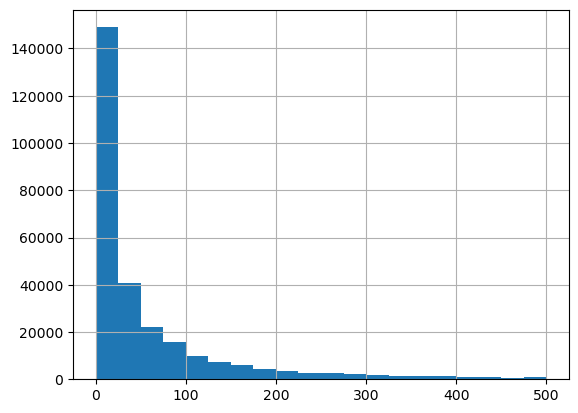

In [3]:
import matplotlib.pyplot as plt
transactions["Amount"].hist(bins=20, range=(0, 500))
plt.show()

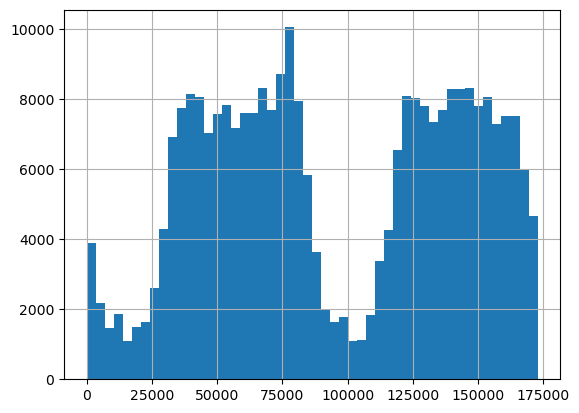

In [4]:
transactions["Time"].hist(bins=50)
plt.show()

In [5]:
corr_matrix = transactions.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

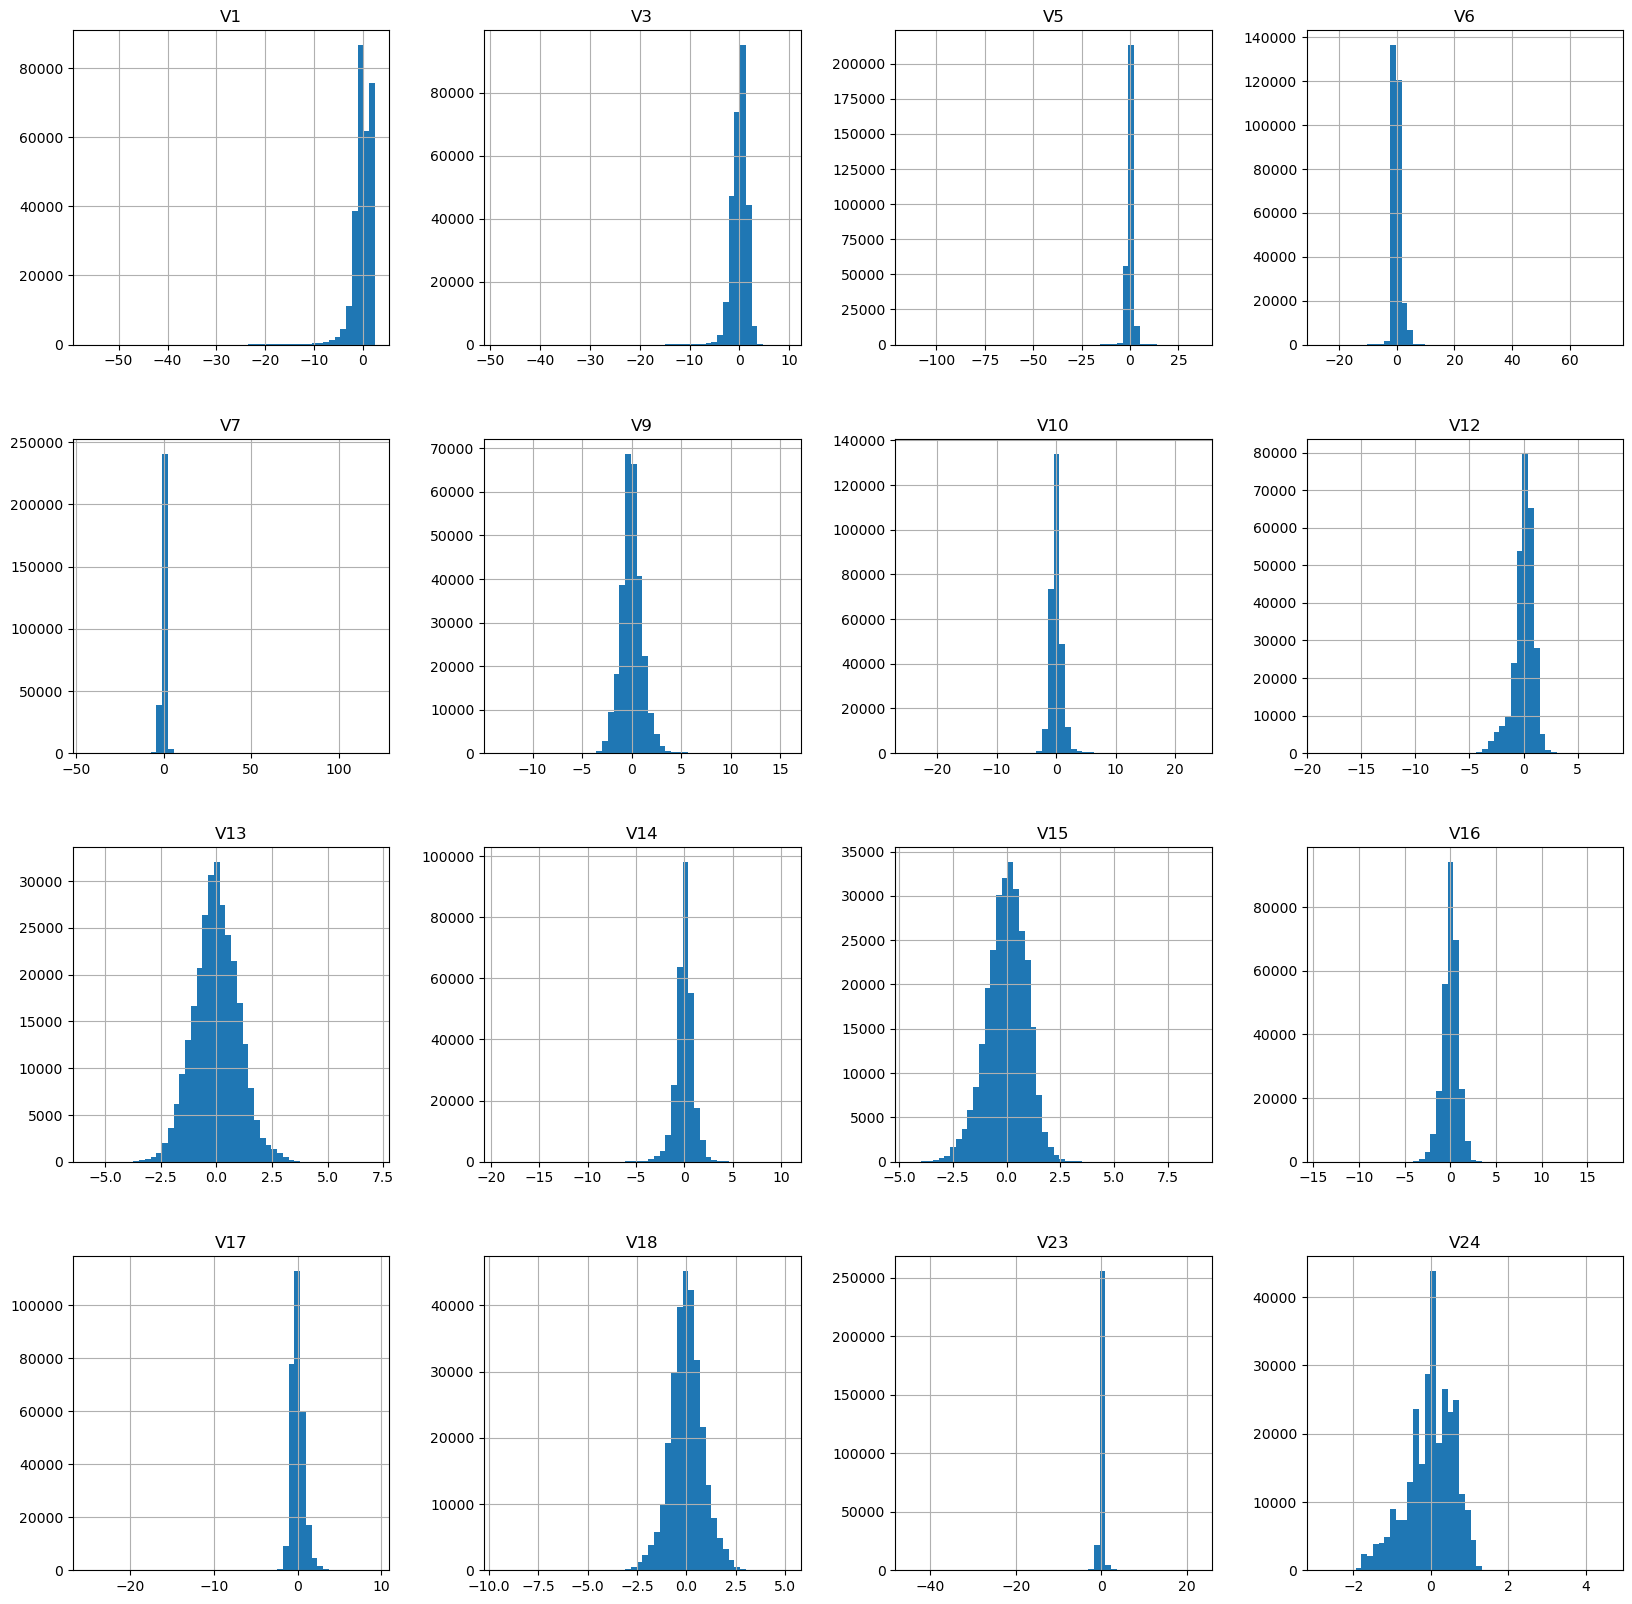

In [39]:
keys = corr_matrix["Class"].keys()

significant_features_literals = [x for x in keys if corr_matrix["Class"][x] < 0]
significant_features = transactions[significant_features_literals]
significant_features.drop("Time",axis=1).hist(bins=50, figsize=(20, 20))
plt.show()

In [72]:
corr_matrix_significant_features = corr_matrix["Class"][significant_features_literals]
corr_matrix_significant_features.sort_values(ascending=False)

V23    -0.002685
V15    -0.004223
V13    -0.004570
V24    -0.007221
Time   -0.012323
V6     -0.043643
V5     -0.094974
V9     -0.097733
V1     -0.101347
V18    -0.111485
V7     -0.187257
V3     -0.192961
V16    -0.196539
V10    -0.216883
V12    -0.260593
V14    -0.302544
V17    -0.326481
Name: Class, dtype: float64

In [8]:
corr_matrix_amount = corr_matrix["Amount"][significant_features_literals].sort_values()
corr_matrix_time = corr_matrix["Time"][significant_features_literals].sort_values()
display(corr_matrix_amount)
display(corr_matrix_time)
#there is no relation between the promising features and the known features, it all seems rather random

V5     -0.386356
V1     -0.227709
V3     -0.210880
V23    -0.112633
V10    -0.101502
V9     -0.044246
Time   -0.010596
V12    -0.009542
V16    -0.003910
V15    -0.002986
V24     0.005146
V13     0.005293
V17     0.007309
V14     0.033751
V18     0.035650
V6      0.215981
V7      0.397311
Name: Amount, dtype: float64

V3     -0.419618
V15    -0.183453
V14    -0.098757
V17    -0.073297
V13    -0.065902
V6     -0.063016
V24    -0.016182
V9     -0.008660
V16     0.011903
V10     0.030617
V23     0.051142
V7      0.084714
V18     0.090438
V1      0.117396
V12     0.124348
V5      0.173072
Time    1.000000
Name: Time, dtype: float64

In [83]:
import math
def Feature_Extractor(operation, dataframe):
    new_dataframe = dataframe.copy()
    if operation == "square":
        new_dataframe = {x: np.square(new_dataframe[x]) for x in new_dataframe}
    elif operation == "cube":
        new_dataframe = {x: np.power(new_dataframe[x], 3) for x in new_dataframe}
        new_dataframe = {x:np.log(new_dataframe[x]) for x in new_dataframe}
    elif operation == "tanh":
        new_dataframe = {x:np.tanh(new_dataframe[x]) for x in new_dataframe}
    
    new_dataframe = pd.DataFrame(new_dataframe)
    new_dataframe.insert(loc=len(new_dataframe.columns), value=transactions["Class"], column="Class")
    return new_dataframe


sqr_significant_features = Feature_Extractor("square", significant_features)
cube_significant_features = Feature_Extractor("cube", significant_features)
tanh_significant_features = Feature_Extractor("tanh", significant_features)

In [82]:
corr_matrix_sqr_significant_features = sqr_significant_features.corr()
corr_matrix_tanh_significant_features = tanh_significant_features.corr()
corr_matrix_cube_significant_features = cube_significant_features.corr()
display(corr_matrix_sqr_significant_features["Class"].sort_values(ascending=False))
#display(corr_matrix_tanh_significant_features["Class"].sort_values(ascending=False))
#The tanh transformation seems to be pretty much useless 

#display(corr_matrix_cube_significant_features["Class"].sort_values(ascending=False))
#The cube transformation and all powers greater than 2 seem to be also pretty much useless
display(corr_matrix_significant_features.sort_values(ascending=False))


Class    1.000000
V14      0.586959
V17      0.540424
V12      0.528334
V16      0.480886
V18      0.352354
V10      0.330876
V3       0.330216
V9       0.168395
V1       0.119758
V7       0.109476
V5       0.055642
V6       0.012713
V23      0.010664
V15      0.008899
V13      0.006770
V24     -0.006340
Time    -0.011131
Name: Class, dtype: float64

Class    1.000000
V6      -0.000080
V5      -0.000085
V24     -0.000265
V23     -0.000663
V7      -0.001279
V13     -0.002534
V15     -0.002978
Time    -0.009529
V1      -0.022379
V3      -0.084700
V9      -0.099282
V10     -0.206387
V16     -0.279166
V18     -0.337412
V17     -0.347088
V12     -0.353749
V14     -0.357386
Name: Class, dtype: float64

V23    -0.002685
V15    -0.004223
V13    -0.004570
V24    -0.007221
Time   -0.012323
V6     -0.043643
V5     -0.094974
V9     -0.097733
V1     -0.101347
V18    -0.111485
V7     -0.187257
V3     -0.192961
V16    -0.196539
V10    -0.216883
V12    -0.260593
V14    -0.302544
V17    -0.326481
Name: Class, dtype: float64

In [60]:
sqr_all_features = Feature_Extractor("square", transactions.drop(axis=1, labels="Class"))
corr_sqr_all_features = sqr_all_features.corr()
print(corr_sqr_all_features["V17"].sort_values(ascending=False))
#Feature extraction seems to show that features that seemed insignificant are significant after manipulation e.g V4, V9

V17       1.000000
V16       0.837747
V12       0.815532
V14       0.705989
V18       0.672475
V11       0.598825
Class     0.540424
V10       0.511045
V3        0.474697
V4        0.315553
V9        0.259181
V1        0.185029
V7        0.170453
V19       0.112046
V5        0.101729
V8        0.094110
V2        0.066142
V27       0.060301
V21       0.056314
V22       0.043387
V6        0.031246
V25       0.029907
V20       0.019030
V15       0.017198
V23       0.012761
V28       0.012153
V24       0.008885
Amount    0.008830
V13       0.007774
V26      -0.004666
Time     -0.020817
Name: V17, dtype: float64


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(transactions, transactions["Class"]):
    strat_train_set = transactions.loc[train_index]
    strat_test_set = transactions.loc[test_index]



In [ ]:
X_train, y_train = strat_train_set.drop("Class", axis=1), strat_train_set["Class"].copy()
X_test, y_test = strat_test_set.drop("Class", axis=1), strat_test_set["Class"].copy()
